<a href="https://colab.research.google.com/github/sominshim/Predicting_Personality_through_Text/blob/somin/Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

import tensorflow as tf

# !pip install tensorflow-hub
# !pip install tfds-nightly
import tensorflow_hub as hub
import tensorflow_datasets as tfds

print("버전: ", tf.__version__)
print("즉시 실행 모드: ", tf.executing_eagerly())
print("허브 버전: ", hub.__version__)
print("GPU", "사용 가능" if tf.config.experimental.list_physical_devices("GPU") else "사용 불가능")

버전:  2.3.0
즉시 실행 모드:  True
허브 버전:  0.10.0
GPU 사용 가능


In [11]:
#io와 pandas 모듈 import
import io
import pandas as pd

In [13]:
#드라이브에 접근할 수 있도록 아래 코드 입력
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
#불러올 파일의 경로를 filename 변수에 저장
filename = '/content/drive/My Drive/mbti_1.csv'

In [116]:
#pandas read_csv로 불러오기
data = pd.read_csv(filename)
data.head()

type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

# 데이터 탐색 (EDA)

In [118]:
data.isna().sum()

type     0
posts    0
dtype: int64

In [119]:
data.duplicated().sum()

0

In [120]:
data.nunique()

type       16
posts    8675
dtype: int64

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of MBTI type')

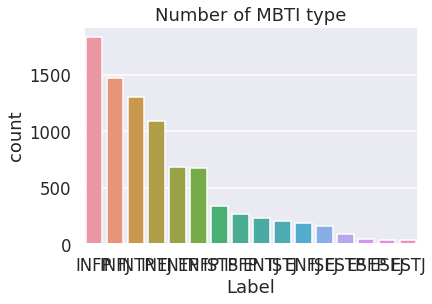

In [122]:
sns.countplot(data.type, order = data['type'].value_counts().index)
plt.xlabel('Label')
plt.title('Number of MBTI type')

# 전처리

## 라벨 이진화


In [146]:
from sklearn.preprocessing import LabelBinarizer

y_data = data['type']
le = LabelBinarizer()
le.fit(y_data)
print(le.classes_)

labels = le.classes_
y_data = le.transform(y_data)
print(y_data)

['ENFJ' 'ENFP' 'ENTJ' 'ENTP' 'ESFJ' 'ESFP' 'ESTJ' 'ESTP' 'INFJ' 'INFP'
 'INTJ' 'INTP' 'ISFJ' 'ISFP' 'ISTJ' 'ISTP']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


>1. 소문자로 변환
2. '|||'제거
3. 구두점 제거
4. URL, 링크 등 제거
5. 단어 벡터화



In [154]:
import re
import string

def cleaner(post):
    # 소문자 변환
    post = post.lower() 
    
    # '|||' 제거
    post = post.replace('|||', "") 

    # URL, 링크 등 특수문자 제거
    post = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', '', post, flags=re.MULTILINE) 

    # 구두점 제거
    post = post.translate(str.maketrans('', '', string.punctuation))

    # 공백 제거
    post=re.sub( '\s+', ' ', post ).strip()
    return post

In [155]:
posts = data.posts.tolist()
posts = [cleaner(post) for post in posts]

In [156]:
# 단어 개수 계산
from collections import Counter

word_count=Counter()
for post in posts:
    word_count.update(post.split(" "))

In [157]:
print(len(word_count))
print(len(posts[0]))

328303
3074


In [158]:
posts

['and intj moments sportscenter not top ten plays prankswhat has been the most lifechanging experience in your life on repeat for most of todaymay the perc experience immerse youthe last thing my infj friend posted on his facebook before committing suicide the next day rest in peace enfj7 sorry to hear of your distress its only natural for a relationship to not be perfection all the time in every moment of existence try to figure the hard times as times of growth as84389 84390 welcome and stuff game set matchprozac wellbrutin at least thirty minutes of moving your legs and i dont mean moving them while sitting in your same desk chair weed in moderation maybe try edibles as a healthier alternativebasically come up with three items youve determined that each type or whichever types you want to do would more than likely use given each types cognitive functions and whatnot when left byall things in moderation sims is indeed a video game and a good one at that note a good one at that is som

In [159]:
train_examples_batch, train_labels_batch = next(iter(posts.batch(10)))
train_examples_batch

AttributeError: ignored

In [ ]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)
hub_layer(train_examples_batch[:3])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 59.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 54.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/pyth

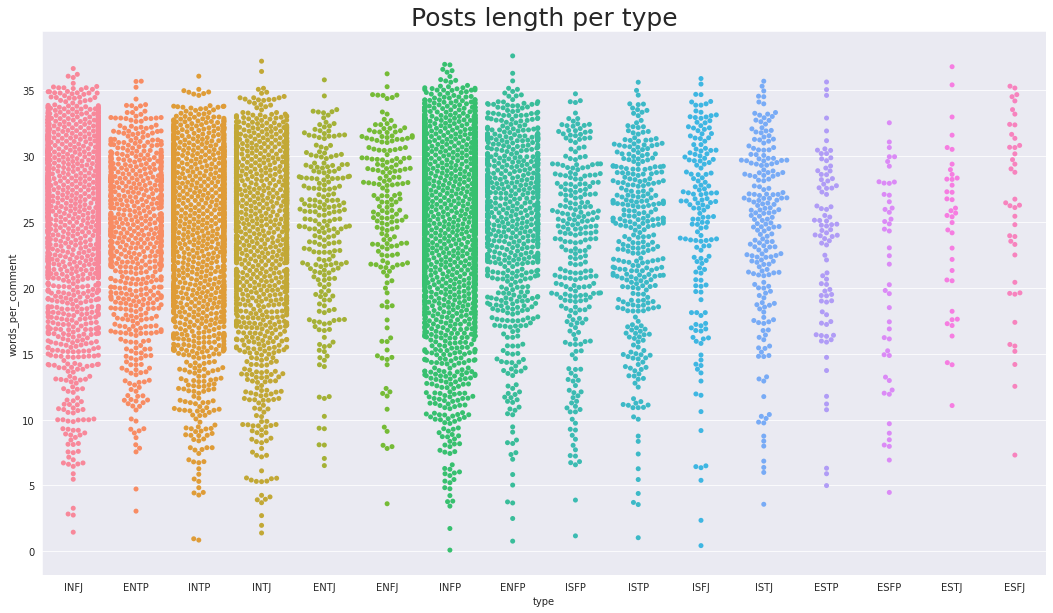

In [100]:
plt.figure(figsize=(18,10))
sns.swarmplot('type', 'words_per_comment', data=data)
sns.set_context('talk')
plt.title('Posts length per type', fontsize=25)
plt.savefig('mbti_posts_length.png')
plt.show()

In [102]:
data.corr()

message_len  ...  variance_of_word_counts
message_len                 1.000000  ...                -0.498424
clean_message_len           0.981506  ...                -0.493379
label_num                  -0.039554  ...                 0.011730
words_per_comment           0.973477  ...                -0.497158
variance_of_word_counts    -0.498424  ...                 1.000000

[5 rows x 5 columns]

# Data processing

In [109]:
# Text Processing
import re
import itertools
import spacy
import string
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_web_sm
from collections import Counter

In [104]:
mbti_text = data[['type','posts']].copy()

In [105]:
mbti_text = mbti_text.fillna('')
text_columns = mbti_text[['type']]
text_columns['text'] = mbti_text.iloc[:,1:].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [107]:
import re #regular expression
def clean_urls(column):
    '''
    This function takes a string and returns a string 
    with its urls removed and all the words in lowercase.
    '''
    return column.apply(lambda x: x.lower()).apply(lambda x: re.sub('http[s]?://\S+', '', x))

text_columns['text'] = clean_urls(text_columns['text'])

In [110]:
nlp = spacy.load('en_core_web_sm', disable = ['ner', 'parser']) 
nlp.max_length = 33000000

In [111]:
def tokenize(string):
    '''
    This function takes a sentence and returns the list of all lemma
    '''
    doc = nlp(string)
    l_token = [token.text for token in doc if not token.is_punct 
               | token.is_space | token.is_stop | token.is_digit & token.is_oov]
    return ' '.join(l_token)


text_columns['text'] = text_columns['text'].apply(lambda row: tokenize(row))

In [112]:
pd_token = pd.DataFrame(text_columns, columns=['type', 'text'])
pd_token.head()

type                                               text
0  INFJ  intj moments sportscenter plays pranks|||what ...
1  ENTP  finding lack posts alarming.|||sex boring posi...
2  INTP  good course know blessing curse.|||does absolu...
3  INTJ  dear intp enjoyed conversation day esoteric ga...
4  ENTJ  fired.|||that silly misconception approaching ...

In [113]:
pd_token['text'][0][:700]

'intj moments sportscenter plays pranks|||what life changing experience life?||| repeat today.|||may perc experience immerse you.|||the thing infj friend posted facebook committing suicide day rest peace~ enfj7 sorry hear distress natural relationship perfection time moment existence try figure hard times times growth |||84389 |||welcome stuff.||| game set match.|||prozac wellbrutin thirty minutes moving legs mean moving sitting desk chair weed moderation maybe try edibles healthier alternative |||basically come items determined type whichever types want likely use given types cognitive functions whatnot left |||all things moderation sims video game good note good somewhat subjective complete'

In [125]:
pd_token.columns

Index(['type', 'text'], dtype='object')

In [138]:
def clean_url(str_text_raw):
    """This function eliminate a string URL in a given text"""
    str_text = re.sub("url_\S+", "", str_text_raw)
    str_text = re.sub("email_\S+", "", str_text)
    str_text = re.sub("phone_\S+", "", str_text)
    return(re.sub("http[s]?://\S+", "", str_text))
    
def clean_punctuation(str_text_raw):
    # """This function replace some of the troublemaker puntuation elements in a given text"""
    return(re.sub("[$\(\)/|{|\}#~\[\]^#;:!?¿]", " ", str_text_raw))

def clean_unicode(str_text_raw):
    """This function eliminate non-unicode text"""
    str_text = re.sub("&amp;", "", str_text_raw)
    return(re.sub(r"[^\x00-\x7F]+"," ", str_text))
                      
def clean_dot_words(str_text_raw):
    """This function replace dots between words"""
    return(re.sub(r"(\w+)\.+(\w+)", r"\1 \2",str_text_raw))

def clean_text(str_text_raw):
    """This function sets the text to lowercase and applies previous cleaning functions """
    str_text = str_text_raw.lower()
    str_text = clean_dot_words(clean_punctuation(clean_unicode(clean_url(str_text))))
    return(str_text)

In [139]:
tokens_to_drop=["+"]

def string_to_token(string, str_pickle = None):
    """
    This function takes a sentence and returns the list of tokens and all their information
    * Text: The original text of the lemma.
    * Lemma: Lemma.
    * Orth: The hash value of the lemma.
    * is alpha: Does the lemma consist of alphabetic characters?
    * is digit: Does the lemma consist of digits?
    * is_title: Is the token in titlecase? 
    * is_punct: Is the token punctuation?
    * is_space: Does the token consist of whitespace characters?
    * is_stop: Is the token part of a “stop list”?
    * is_digit: Does the token consist of digits?
    * lang: Language of the token
    * tag: Fine-grained part-of-speech. The complete list is in: 
    https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html, also using: spacy.explain("RB")
    * pos: Coarse-grained part-of-speech.
    * has_vector: A boolean value indicating whether a word vector is associated with the token.
    * vector_norm: The L2 norm of the token’s vector representation.
    * is_ovv: """
    doc = nlp(string)
    l_token = [[token.text, token.lemma_, token.orth, token.is_alpha, token.is_digit, token.is_title, token.lang_, 
        token.tag_, token.pos_, token.has_vector, token.vector_norm, token.is_oov]
        for token in doc if not token.is_punct | token.is_space | token.is_stop | token.is_digit | token.like_url 
               | token.like_num | token.like_email & token.is_oov]
    pd_token = pd.DataFrame(l_token, columns=["text", "lemma", "orth", "is_alpha", "is_digit", "is_title", "language",
                                          "tag", "part_of_speech", "has_vector", "vector_norm", "is_oov"])
    #drop problematic tokens
    pd_token = pd_token[~pd_token["text"].isin(tokens_to_drop)]
    #Convert plural text to singular
    pd_token["text_to_singular"] = np.where(pd_token["tag"].isin(["NNPS", "NNS"]), pd_token["lemma"], pd_token["text"])
    if(str_pickle!=None):
        pd_token.to_pickle(f"{str_pickle}.pkl")
    del l_token
    return(pd_token)

def apply_cleaning(string):
    """
    This function takes a sentence and returns a clean text
    """
    doc = nlp(clean_text(string))
    l_token = [token.text for token in doc if not token.is_punct | token.is_space | token.is_stop | 
               token.is_digit | token.like_url | token.like_num | token.like_email & token.is_oov]
    return " ".join(l_token)

def apply_lemma(string):
    """
    This function takes a sentence and returns a clean text
    """
    doc = nlp(clean_text(string))
    l_token = [token.lemma_ for token in doc if not token.is_punct | token.is_space | token.is_stop | 
               token.is_digit | token.like_url | token.like_num | token.like_email & token.is_oov]
    return " ".join(l_token)

def list_to_bow(l_words):
    """
    This function takes a list of words and create the bag of words ordered by desc order
    """
    cv = CountVectorizer(l_words)
    # show resulting vocabulary; the numbers are not counts, they are the position in the sparse vector.
    count_vector=cv.fit_transform(l_words)
    word_freq = Counter(l_words)
    print(f"Bag of words size: {count_vector.shape}\nUnique words size: {len(word_freq)}")
    dict_word_freq = dict(word_freq.most_common())
    return(dict_word_freq)

In [142]:
mbti_df_clean = pd.DataFrame(data[["type", "posts"]])
for c in data.columns:
    mbti_df_clean[c] = mbti_df_raw[c].apply(lambda row: clean_text(row))
mbti_df_clean["posts"] = mbti_df_raw[posts].apply(lambda x: " ".join(x), axis=1)
mbti_df_clean.head()

NameError: ignored

In [126]:
X = pd_token.text
Y = pd_token.type
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2)

In [114]:
from multiprocessing import Pool

In [115]:
def _apply_df(args):
  df, func, kwargs = args
  return df.apply(func, **kwargs)

def apply_by_multiprocessing(df, func, **kwargs):
  workers = kwargs.pop('workers')
  pool = Pool(processes= workers)
  result = pool.map(_apply_df, [(d, func, kwargs) \
                                for d in np.array_split(df, workers)])
  pool.close()

  return pd.concat(list(result))

In [128]:
clean_train_rewiews = apply_by_multiprocessing(\
                          X_train, Y_train)

KeyError: ignored

In [39]:
X = data.posts

In [45]:
import string
x = string.punctuation
x

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [46]:
from nltk.corpus import stopwords

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords 
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [47]:
data.head()

type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...

# Tokenize

In [50]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [51]:
data['clean_msg'] = data.posts.apply(text_process)

In [52]:
data.head()

type  ...                                          clean_msg
0  INFJ  ...  httpwwwyoutubecomwatchvqsXHcwe3krwhttp41mediat...
1  ENTP  ...  finding lack posts alarmingSex boring position...
2  INTP  ...  Good one httpswwwyoutubecomwatchvfHiGbolFFGwOf...
3  INTJ  ...  Dear INTP enjoyed conversation day Esoteric ga...
4  ENTJ  ...  Youre firedThats another silly misconception a...

[5 rows x 3 columns]

In [55]:
data['message_len'] = data.posts.apply(len)
data['clean_message_len'] = data.clean_msg.apply(len)
data.head()

type  ... clean_message_len
0  INFJ  ...              3160
1  ENTP  ...              4331
2  INTP  ...              3308
3  INTJ  ...              3831
4  ENTJ  ...              3787

[5 rows x 5 columns]

In [57]:
le = LabelEncoder()
data["label_num"] = le.fit_transform(data['type'])

In [89]:
data.drop_duplicates(['type']).sort_values(by='label_num')

type  ... label_num
11   ENFJ  ...         0
26   ENFP  ...         1
4    ENTJ  ...         2
1    ENTP  ...         3
627  ESFJ  ...         4
200  ESFP  ...         5
546  ESTJ  ...         6
113  ESTP  ...         7
0    INFJ  ...         8
17   INFP  ...         9
3    INTJ  ...        10
2    INTP  ...        11
48   ISFJ  ...        12
27   ISFP  ...        13
88   ISTJ  ...        14
40   ISTP  ...        15

[16 rows x 6 columns]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


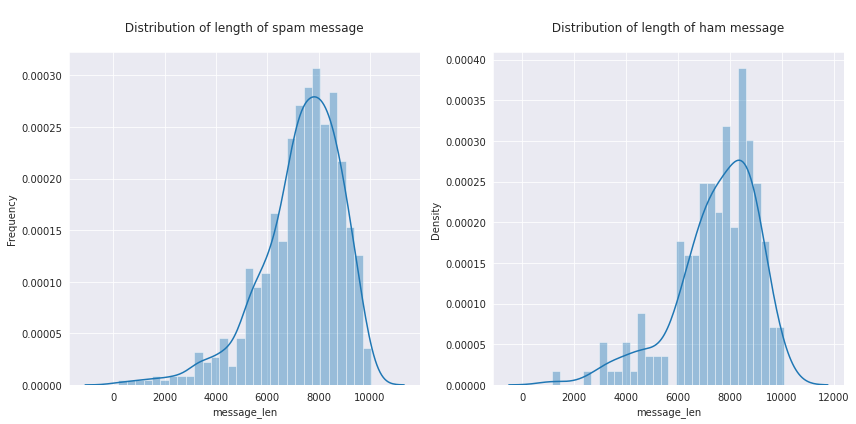

In [58]:
#creating subplots to see distribution of length of tweet
sns.set_style("darkgrid");
f, (ax1, ax2) = plt.subplots(figsize=(12,6),nrows=1, ncols=2,tight_layout=True);
sns.distplot(data[data['label_num']==1]["message_len"],bins=30,ax=ax1);
sns.distplot(data[data['label_num']==0]["message_len"],bins=30,ax=ax2);
ax1.set_title('\n Distribution of length of spam message \n');
ax2.set_title('\n Distribution of length of ham message \n');
ax1.set_ylabel('Frequency');

In [61]:
from collections import Counter

words = data[data.label_num ==0].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
    ham_words.update(msg)
    
print(ham_words.most_common(50))

[('like', 1595), ('think', 1201), ('people', 1089), ('know', 904), ('really', 864), ('would', 769), ('one', 740), ('get', 717), ('enfj', 690), ('feel', 665), ('love', 612), ('time', 574), ('ive', 569), ('much', 540), ('say', 488), ('good', 460), ('something', 458), ('things', 457), ('want', 447), ('see', 446), ('way', 435), ('someone', 416), ('also', 391), ('well', 385), ('always', 374), ('friends', 368), ('type', 353), ('lot', 351), ('make', 347), ('could', 345), ('go', 338), ('thing', 335), ('enfjs', 332), ('even', 332), ('person', 324), ('need', 313), ('right', 310), ('youre', 309), ('find', 307), ('never', 306), ('thats', 302), ('going', 297), ('life', 296), ('friend', 286), ('though', 285), ('pretty', 284), ('sure', 275), ('said', 265), ('cant', 256), ('actually', 255)]


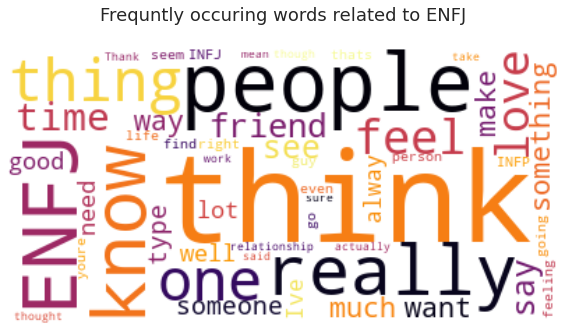

In [90]:
# word cloud for words related to ham message 
from wordcloud import WordCloud
text=" ".join(post for post in data[data['label_num']==0].clean_msg)
wordcloud = WordCloud(max_font_size=90, max_words=50, background_color="white", colormap="inferno").generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Frequntly occuring words related to ENFJ \n',fontsize=18)
plt.axis("off")
plt.show()

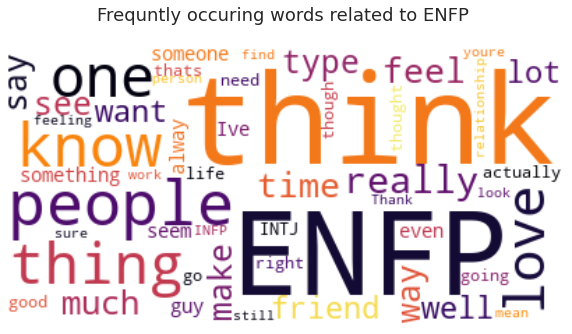

In [92]:
text=" ".join(post for post in data[data['label_num']==1].clean_msg)
wordcloud = WordCloud(max_font_size=90, max_words=50, background_color="white", colormap="inferno").generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Frequntly occuring words related to ENFP \n',fontsize=18)
plt.axis("off")
plt.show()

In [ ]:
text=" ".join(post for post in data[data['label_num']==0].clean_msg)
wordcloud = WordCloud(max_font_size=90, max_words=50, background_color="white", colormap="inferno").generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Frequntly occuring words related to ENFJ \n',fontsize=18)
plt.axis("off")
plt.show()

In [40]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [42]:
vect.fit(X)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [43]:
vect.get_feature_names()

['00',
 '000',
 '0000',
 '000000',
 '0000000000',
 '000000000000000',
 '00000000000000000000000000000000027',
 '00000011',
 '000000111',
 '0000001111',
 '000000345d4eb12f_zps379437f6',
 '00000454583df4b1_zpsa8e149c1',
 '00001010',
 '000037419995',
 '00005a57ffffa5a8',
 '00007',
 '000077',
 '000086606',
 '0001',
 '00011',
 '000219000',
 '000225',
 '00023768',
 '00025',
 '000262f6',
 '00027y1g',
 '00028qcr',
 '0002e71f56b2fa9832bd555cdfc9efa5',
 '00032',
 '0005ez9k',
 '0006',
 '000646_lg',
 '0008',
 '000829077',
 '0009x85h',
 '000k',
 '000th',
 '001',
 '0010',
 '00100000',
 '00100001',
 '00100111',
 '00101100',
 '00101110',
 '00111111',
 '001114849',
 '00119',
 '0013',
 '0013k20t',
 '0015',
 '00159265',
 '001vqawidn0',
 '002',
 '002368741',
 '00242',
 '002514855',
 '002775161',
 '003',
 '003306',
 '003_tyler_durden',
 '004',
 '00424',
 '0043',
 '0045',
 '0048',
 '005',
 '0057036g',
 '005991_zps1d4b6d11',
 '005cfww4',
 '005fa5b3065c9fd021536037d6eecaf1',
 '006',
 '007',
 '007phantom',
 '0

In [28]:
X = data.posts
Y = data.type
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2)

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2)

In [30]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [31]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [32]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 150, 50)           50000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                

In [33]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
44/44 [==============================] - 1s 23ms/step - loss: -241.9615 - accuracy: 0.0771 - val_loss: -522.8450 - val_accuracy: 0.0821
Epoch 2/10
44/44 [==============================] - 1s 12ms/step - loss: -839.8486 - accuracy: 0.0774 - val_loss: -1189.8275 - val_accuracy: 0.0821
Epoch 3/10
44/44 [==============================] - 1s 12ms/step - loss: -1608.9573 - accuracy: 0.0774 - val_loss: -2055.8452 - val_accuracy: 0.0821
Epoch 4/10
44/44 [==============================] - 1s 12ms/step - loss: -2581.7258 - accuracy: 0.0774 - val_loss: -3127.7461 - val_accuracy: 0.0821
Epoch 5/10
44/44 [==============================] - 1s 12ms/step - loss: -3766.5994 - accuracy: 0.0774 - val_loss: -4405.0522 - val_accuracy: 0.0821
Epoch 6/10
44/44 [==============================] - 0s 11ms/step - loss: -5148.8472 - accuracy: 0.0774 - val_loss: -5892.6304 - val_accuracy: 0.0821
Epoch 7/10
44/44 [==============================] - 1s 12ms/step - loss: -6762.2646 - accuracy: 0.0774 - val_

In [34]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [35]:
accr = model.evaluate(test_sequences_matrix,Y_test)

55/55 [==============================] - 0s 6ms/step - loss: -14190.0625 - accuracy: 0.0755


In [36]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: -14190.062
  Accuracy: 0.076


In [37]:
X_train

6351    'I fear that I'm not an INTP, that I'm actuall...
2970    'We- of the other 15 MBTI types- have surely n...
3206    'As stressful as school is, I'm happy to say t...
2869    'goastfarmer, please. thanks.|||pickpockets  n...
8629    'A chimichanga.|||Hello, dear fellow café-memb...
                              ...                        
3865    Most of the ENFJs here are out socializing. As...
1636    5w4-4w5-8w9 Sp/Sx  http://stwww.skateboarderma...
4287    'Don't you have fun flirting?|||I don't associ...
6691    'Donate/sell my stuff, or let my parents deal ...
7503    'Pretty please, with a cherry on top, help me ...
Name: posts, Length: 6940, dtype: object

In [38]:
Y

array([[ 8],
       [ 3],
       [11],
       ...,
       [11],
       [ 9],
       [ 9]])